In [1]:
import pandas as pd
import sqlite3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

## Data Preprocessing

In [2]:
conn = sqlite3.connect(r'C:\Users\Owner\dev\algobetting\infra\data\db\algobetting.db')

df = pd.read_sql_query("SELECT * FROM fbref_team_goals_features_005_365 WHERE match_date > '2021-11-01'", conn)

df

,match_url,match_date,season,division,team,opp_team,is_home,goals,opp_goals,xg,...,opp_weighted_defense_opp_goals,opp_weighted_defense_opp_shots,opp_weighted_defense_opp_shots_on_target,opp_weighted_defense_opp_xg,opp_weighted_defense_opp_npxg,opp_weighted_defense_opp_touches_att_pen_area,opp_weighted_defense_opp_touches_att_3rd,opp_weighted_defense_opp_touches,opp_weighted_defense_opp_pens_won,opp_weighted_defense_opp_corner_kicks
0,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Premier-League,Leicester City,Newcastle Utd,1,0,3,0.5,...,1.455964,12.906852,4.355476,1.303009,1.251797,24.197442,155.426749,602.362132,0.065146,4.995137
1,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Premier-League,Newcastle Utd,Leicester City,0,3,0,3.3,...,2.316454,16.130546,5.494694,1.887059,1.825313,31.816265,195.700380,690.196090,0.073388,6.049093
2,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Premier-League,Manchester Utd,Manchester City,1,0,0,0.9,...,1.247461,9.464969,3.624739,1.283831,1.218377,18.396063,101.868168,517.512371,0.081817,3.457143
3,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Premier-League,Manchester City,Manchester Utd,0,0,0,0.5,...,1.388690,12.012086,4.125325,1.549812,1.440821,22.861867,150.093587,588.030979,0.103199,5.190624
4,https://fbref.com/en/matches/f671e515/Tottenha...,2025-04-06 00:00:00,2024-2025,Premier-League,Tottenham,Southampton,1,3,1,2.1,...,2.381603,17.076964,6.432989,2.281046,2.105396,32.140872,176.702024,626.645503,0.143379,5.438184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,https://fbref.com/en/matches/d9c56744/Strasbou...,2025-05-03 00:00:00,2024-2025,Ligue-1,Paris S-G,Strasbourg,0,1,1,1.7,...,1.145052,13.734494,4.907717,1.665951,1.495487,24.884375,144.979753,614.078200,0.164810,5.012634
13252,https://fbref.com/en/matches/2e39c335/Nice-Rei...,2025-05-02 00:00:00,2024-2025,Ligue-1,Nice,Reims,1,1,0,1.5,...,1.251240,15.561719,5.413224,1.812333,1.704097,29.470333,189.597981,663.755411,0.063336,6.182385
13253,https://fbref.com/en/matches/2e39c335/Nice-Rei...,2025-05-02 00:00:00,2024-2025,Ligue-1,Reims,Nice,0,0,1,1.3,...,1.301856,13.598426,4.845708,1.160399,1.122322,21.541967,161.030581,661.979036,0.023501,5.704559
13254,https://fbref.com/en/matches/15ee650c/Montpell...,2025-03-16 00:00:00,2024-2025,Ligue-1,Montpellier,Saint-Étienne,1,0,2,NaN,...,2.152759,15.295527,5.873893,2.415661,1.971093,28.419281,157.905800,658.945829,0.315185,5.911481


In [3]:
df_form = pd.read_sql_query("SELECT * FROM fbref_team_goals_features_015_90 WHERE match_date > '2021-11-01'", conn)

df_form

,match_url,match_date,season,division,team,opp_team,is_home,goals,opp_goals,xg,...,opp_weighted_defense_opp_goals,opp_weighted_defense_opp_shots,opp_weighted_defense_opp_shots_on_target,opp_weighted_defense_opp_xg,opp_weighted_defense_opp_npxg,opp_weighted_defense_opp_touches_att_pen_area,opp_weighted_defense_opp_touches_att_3rd,opp_weighted_defense_opp_touches,opp_weighted_defense_opp_pens_won,opp_weighted_defense_opp_corner_kicks
0,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Premier-League,Leicester City,Newcastle Utd,1,0,3,0.5,...,1.712558,12.655325,4.267425,1.468810,1.310433,26.187580,157.201346,612.472494,0.197971,5.018740
1,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Premier-League,Newcastle Utd,Leicester City,0,3,0,3.3,...,2.278053,14.789835,4.884057,1.686982,1.578971,30.543689,200.186310,715.141976,0.120012,5.598570
2,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Premier-League,Manchester Utd,Manchester City,1,0,0,0.9,...,1.148696,9.239381,3.390274,1.024693,1.024693,18.832421,99.874169,494.972221,0.000000,3.698817
3,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Premier-League,Manchester City,Manchester Utd,0,0,0,0.5,...,1.173905,12.111885,4.245640,1.518469,1.478379,23.533758,164.748472,599.087082,0.000000,5.290851
4,https://fbref.com/en/matches/f671e515/Tottenha...,2025-04-06 00:00:00,2024-2025,Premier-League,Tottenham,Southampton,1,3,1,2.1,...,2.671219,15.187639,6.286130,2.234169,1.961194,29.822017,168.782736,660.769877,0.228210,3.696334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,https://fbref.com/en/matches/3537bd55/Celta-Vi...,2025-05-10 00:00:00,2024-2025,La-Liga,Sevilla,Celta Vigo,0,2,3,2.3,...,1.539144,8.879193,3.269573,1.149108,1.003282,17.062809,126.176285,608.334141,0.145158,3.980101
12902,https://fbref.com/en/matches/ed775615/Valencia...,2025-05-10 00:00:00,2024-2025,La-Liga,Valencia,Getafe,1,3,0,2.7,...,1.159396,10.627932,3.777317,1.264169,1.148785,16.800673,112.018875,614.185165,0.122885,3.916741
12903,https://fbref.com/en/matches/ed775615/Valencia...,2025-05-10 00:00:00,2024-2025,La-Liga,Getafe,Valencia,0,0,3,0.5,...,1.200746,11.742634,4.323131,1.181802,1.050070,20.869857,163.080378,625.093510,0.164665,4.956454
12904,https://fbref.com/en/matches/ce67853a/Las-Palm...,2025-05-09 00:00:00,2024-2025,La-Liga,Las Palmas,Rayo Vallecano,1,0,1,0.7,...,1.823999,10.930865,3.947282,1.719831,1.417106,20.410128,119.291161,534.288506,0.385191,4.792832


In [4]:
def add_form_features(df, df_form):

   
    # Create a temporary copy of df_form with renamed columns
    df_form_renamed = df_form.copy()
    
    # Identify all the weighted feature columns
    weighted_cols = [col for col in df_form.columns if 
                    col.startswith('weighted_attack_') or 
                    col.startswith('opp_weighted_defense_opp_')]
    
    # Rename the columns to add "_form" suffix
    rename_dict = {col: f"{col}_form" for col in weighted_cols}
    df_form_renamed.rename(columns=rename_dict, inplace=True)
    
    # Keep only necessary columns for the merge
    merge_cols = ['match_url', 'match_date', 'team', 'opp_team'] + list(rename_dict.values())
    df_form_renamed = df_form_renamed[merge_cols]
    
    # Merge with the original dataframe
    enhanced_df = pd.merge(
        df, 
        df_form_renamed,
        on=['match_url', 'match_date', 'team', 'opp_team'],
        how='left'
    )
    
    # Fill missing form values with the corresponding 365-day values
    for old_col, new_col in rename_dict.items():
        enhanced_df[new_col].fillna(enhanced_df[old_col], inplace=True)
    
    return enhanced_df

#df = add_form_features(df, df_form)


#df

### Feature Engineering

In [5]:
# Create a function to generate all the gap metrics
def add_features(X, df):
    # Original gap metrics code
    attack_features = [col for col in X.columns if col.startswith('weighted_attack_')]
    defense_features = [col for col in X.columns if col.startswith('opp_weighted_defense_')]
    
    feature_pairs = []
    for attack_feature in attack_features:
        metric = attack_feature.replace('weighted_attack_', '')
        defense_feature = f'opp_weighted_defense_opp_{metric}'
        
        if defense_feature in defense_features:
            feature_pairs.append((attack_feature, defense_feature, metric))
    
    for attack_feature, defense_feature, metric in feature_pairs:
        # Gap metrics
        gap_feature_name = f'{metric}_gap'
        X[gap_feature_name] = X[attack_feature] - X[defense_feature]
        
        # Ratio metrics
        ratio_feature_name = f'{metric}_ratio'
        X[ratio_feature_name] = X[attack_feature] / X[defense_feature].replace(0, 0.001)
        X[ratio_feature_name] = X[ratio_feature_name].replace([np.inf, -np.inf], np.nan)
        X[ratio_feature_name] = X[ratio_feature_name].fillna(X[ratio_feature_name].mean())
        
        # Interaction terms
        interaction_feature_name = f'{metric}_interaction'
        X[interaction_feature_name] = X[attack_feature] * X[defense_feature]
        
        # Normalized gap
        norm_gap_feature_name = f'{metric}_norm_gap'
        denominator = X[attack_feature] + X[defense_feature]
        X[norm_gap_feature_name] = X[gap_feature_name] / denominator.replace(0, 0.001)
        X[norm_gap_feature_name] = X[norm_gap_feature_name].replace([np.inf, -np.inf], np.nan)
        X[norm_gap_feature_name] = X[norm_gap_feature_name].fillna(X[norm_gap_feature_name].mean())

    
    return X

# Usage:
df = add_features(df.copy(), df)

# Print the new features
new_features = [col for col in df.columns if col.endswith('_gap') or col.endswith('_ratio')]


df

,match_url,match_date,season,division,team,opp_team,is_home,goals,opp_goals,xg,...,touches_interaction,touches_norm_gap,pens_won_gap,pens_won_ratio,pens_won_interaction,pens_won_norm_gap,corner_kicks_gap,corner_kicks_ratio,corner_kicks_interaction,corner_kicks_norm_gap
0,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Premier-League,Leicester City,Newcastle Utd,1,0,3,0.5,...,345798.136171,-0.024049,-0.026924,0.586706,0.002490,-0.260473,-1.571673,0.685359,17.100672,-0.186691
1,https://fbref.com/en/matches/d8efb6cc/Leiceste...,2025-04-07 00:00:00,2024-2025,Premier-League,Newcastle Utd,Leicester City,0,3,0,3.3,...,417389.172615,-0.065993,0.032664,1.445091,0.007783,0.182035,-0.629386,0.895954,32.784312,-0.054878
2,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Premier-League,Manchester Utd,Manchester City,1,0,0,0.9,...,338876.337029,0.117122,0.026175,1.319927,0.008836,0.137904,1.706097,1.493499,17.850059,0.197914
3,https://fbref.com/en/matches/53e359bb/Manchest...,2025-04-06 00:00:00,2024-2025,Premier-League,Manchester City,Manchester Utd,0,0,0,0.5,...,433039.493222,0.112040,0.040307,1.390579,0.014810,0.163382,1.061102,1.204427,32.450363,0.092735
4,https://fbref.com/en/matches/f671e515/Tottenha...,2025-04-06 00:00:00,2024-2025,Premier-League,Tottenham,Southampton,1,3,1,2.1,...,413929.899694,0.026339,-0.048526,0.661554,0.013600,-0.203692,1.285095,1.236310,36.562428,0.105669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,https://fbref.com/en/matches/d9c56744/Strasbou...,2025-05-03 00:00:00,2024-2025,Ligue-1,Paris S-G,Strasbourg,0,1,1,1.7,...,537585.241409,0.175464,-0.055422,0.663720,0.018028,-0.202125,1.610965,1.321381,33.201673,0.138444
13252,https://fbref.com/en/matches/2e39c335/Nice-Rei...,2025-05-02 00:00:00,2024-2025,Ligue-1,Nice,Reims,1,1,0,1.5,...,402368.172303,-0.045321,0.066999,2.057839,0.008255,0.345943,-0.923796,0.850576,32.510620,-0.080745
13253,https://fbref.com/en/matches/2e39c335/Nice-Rei...,2025-05-02 00:00:00,2024-2025,Ligue-1,Reims,Nice,0,0,1,1.3,...,366733.928241,-0.088803,0.031115,2.323953,0.001284,0.398307,-1.909312,0.665301,21.650206,-0.200984
13254,https://fbref.com/en/matches/15ee650c/Montpell...,2025-03-16 00:00:00,2024-2025,Ligue-1,Montpellier,Saint-Étienne,1,0,2,NaN,...,349236.443719,-0.108461,-0.195876,0.378536,0.037604,-0.450815,-1.137523,0.807574,28.221162,-0.106455


## Model Training

In [6]:
X = df.drop(columns=["team", "opp_team", "goals", "opp_goals", "match_url",  "match_date", "xg", "opp_xg"])
X = pd.get_dummies(X, columns=["season", "division"], drop_first=True)
y = df["goals"]

# Use matches after a certain date as test
cutoff_date = '2024-08-01'
df['match_date'] = pd.to_datetime(df['match_date'])

train_mask = df['match_date'] < cutoff_date
test_mask = df['match_date'] >= cutoff_date

X_train = X[train_mask]
X_test = X[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]

# Create DMatrix objects BEFORE using them in eval_list
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'count:poisson',
    'max_depth': 7,
    'eta': 0.1,
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'eval_metric': 'poisson-nloglik'
}

num_rounds = 100
eval_list = [(dtrain, 'train'), (dtest, 'eval')]  # Now dtrain and dtest are defined

model = xgb.train(
    params, 
    dtrain, 
    num_rounds, 
    eval_list, 
    early_stopping_rounds=10,
    verbose_eval=10
)

# Make predictions
preds = model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

[0]	train-poisson-nloglik:1.53585	eval-poisson-nloglik:1.52882


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[10]	train-poisson-nloglik:1.44452	eval-poisson-nloglik:1.47477
[20]	train-poisson-nloglik:1.39730	eval-poisson-nloglik:1.45892
[30]	train-poisson-nloglik:1.36905	eval-poisson-nloglik:1.45432
[40]	train-poisson-nloglik:1.34854	eval-poisson-nloglik:1.45521
[41]	train-poisson-nloglik:1.34704	eval-poisson-nloglik:1.45524
RMSE: 1.1446
MAE: 0.9028


In [7]:
# Get feature importance
importance = model.get_score(importance_type='gain')

# Convert to DataFrame for easier manipulation
importance_df = pd.DataFrame({'Feature': list(importance.keys()), 
                             'Importance': list(importance.values())})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Normalize to 0-100 scale
importance_df['Importance'] = 100 * importance_df['Importance'] / importance_df['Importance'].max()

# Display results
importance_df

,Feature,Importance
35,xg_interaction,100.000000
39,npxg_interaction,40.908715
43,touches_att_pen_area_interaction,30.600626
23,goals_interaction,28.935788
0,is_home,25.173946
...,...,...
61,season_2022-2023,7.321821
3,weighted_attack_shots_on_target,6.571302
1,weighted_attack_goals,5.925848
48,touches_att_3rd_norm_gap,5.712479


## Parameter Tuning

In [8]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
import xgboost as xgb
import scipy.stats as stats
import pandas as pd
import time
from scipy.special import loggamma

# Define a simplified approach without custom scorers
def tune_xgb_poisson_model_simple(X_train, y_train, X_test, y_test):
    """
    A simplified approach to hyperparameter tuning for XGBoost with Poisson objective.
    Uses XGBoost's built-in evaluation metrics to avoid serialization issues.
    
    Parameters:
    -----------
    X_train : DataFrame or array
        Training features
    y_train : Series or array
        Training target values
    X_test : DataFrame or array
        Test features
    y_test : Series or array
        Test target values
        
    Returns:
    --------
    final_model : XGBRegressor
        The trained model with the best parameters
    best_params : dict
        The best parameters found
    """
    # Create a manual train/validation split for parameter tuning
    X_train_split, X_valid, y_train_split, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    
    # Record start time
    start_time = time.time()
    
    print("=== Manual Hyperparameter Tuning Approach ===")
    
    # Define parameter grid for first stage - broad search
    param_grid = {
        'max_depth': [3, 4, 5, 6, 7],
        'eta': [0.01, 0.03, 0.05, 0.1, 0.15],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.01, 0.1, 0.5],
        'reg_lambda': [0.01, 0.1, 0.5, 1.0]
    }
    
    # Generate combinations for stage 1 (subset of the grid)
    import itertools
    import random
    
    # Create a subset of parameter combinations for manageable testing
    keys = list(param_grid.keys())
    # Take reduced number of values per parameter to keep total combinations reasonable
    values = [random.sample(param_grid[k], min(2, len(param_grid[k]))) for k in keys]
    combinations = list(itertools.product(*values))
    
    # Shuffle and limit to 40 combinations
    random.seed(42)
    random.shuffle(combinations)
    combinations = combinations[:40]
    
    # Convert combinations to list of dictionaries
    param_combinations = [dict(zip(keys, combo)) for combo in combinations]
    
    # Manual hyperparameter search
    best_score = float('inf')
    best_params = None
    best_model = None
    
    print(f"Testing {len(param_combinations)} parameter combinations...")
    
    # For progress tracking
    total_combinations = len(param_combinations)
    
    for i, params in enumerate(param_combinations):
        if i % 5 == 0:
            print(f"Progress: {i}/{total_combinations} combinations tested")
        
        # Create and train model with current parameters
        model = xgb.XGBRegressor(
            objective='count:poisson',
            eval_metric='poisson-nloglik',
            n_estimators=150,
            early_stopping_rounds=15,
            verbosity=0,
            random_state=42,
            **params
        )
        
        try:
            # Train with early stopping on validation set
            model.fit(
                X_train_split, 
                y_train_split,
                eval_set=[(X_valid, y_valid)],
                verbose=False
            )
            
            # Get validation score from the model's history
            val_score = model.evals_result()['validation_0']['poisson-nloglik'][model.best_iteration-1]
            
            # Update best if this is better
            if val_score < best_score:
                best_score = val_score
                best_params = params.copy()
                best_model = model
                
                print(f"New best score: {best_score:.6f} with params: {best_params}")
        
        except Exception as e:
            print(f"Error with params {params}: {e}")
            continue
    
    print("\nStage 1 best parameters:", best_params)
    print(f"Stage 1 best score: {best_score:.6f}")
    print(f"Stage 1 runtime: {(time.time() - start_time):.1f} seconds")
    
    # Stage 2: Refine around best parameters
    stage2_start = time.time()
    print("\n=== Stage 2: Refined Parameter Search ===")
    
    # Create refined parameter ranges around best parameters
    refined_param_grid = {}
    
    # For max_depth, try -1, same, and +1
    if 'max_depth' in best_params:
        refined_param_grid['max_depth'] = [
            max(1, best_params['max_depth'] - 1),
            best_params['max_depth'],
            best_params['max_depth'] + 1
        ]
    
    # For learning rate, try 0.8x, same, and 1.2x
    if 'eta' in best_params:
        refined_param_grid['eta'] = [
            max(0.001, best_params['eta'] * 0.8),
            best_params['eta'],
            min(0.3, best_params['eta'] * 1.2)
        ]
    
    # For subsample, try -0.1, same, and +0.1
    if 'subsample' in best_params:
        refined_param_grid['subsample'] = [
            max(0.5, best_params['subsample'] - 0.1),
            best_params['subsample'],
            min(1.0, best_params['subsample'] + 0.1)
        ]
    
    # For colsample_bytree, try -0.1, same, and +0.1
    if 'colsample_bytree' in best_params:
        refined_param_grid['colsample_bytree'] = [
            max(0.5, best_params['colsample_bytree'] - 0.1),
            best_params['colsample_bytree'],
            min(1.0, best_params['colsample_bytree'] + 0.1)
        ]
    
    # For min_child_weight, try -1, same, and +1
    if 'min_child_weight' in best_params:
        refined_param_grid['min_child_weight'] = [
            max(1, best_params['min_child_weight'] - 1),
            best_params['min_child_weight'],
            best_params['min_child_weight'] + 1
        ]
    
    # For gamma, try -0.1, same, and +0.1
    if 'gamma' in best_params:
        refined_param_grid['gamma'] = [
            max(0, best_params['gamma'] - 0.1),
            best_params['gamma'],
            min(0.5, best_params['gamma'] + 0.1)
        ]
    
    # For reg_alpha, try 0.5x, same, and 2x
    if 'reg_alpha' in best_params:
        refined_param_grid['reg_alpha'] = [
            max(0, best_params['reg_alpha'] * 0.5),
            best_params['reg_alpha'],
            best_params['reg_alpha'] * 2 if best_params['reg_alpha'] > 0 else 0.01
        ]
    
    # For reg_lambda, try 0.5x, same, and 2x
    if 'reg_lambda' in best_params:
        refined_param_grid['reg_lambda'] = [
            max(0.01, best_params['reg_lambda'] * 0.5),
            best_params['reg_lambda'],
            best_params['reg_lambda'] * 2
        ]
    
    # Generate combinations for stage 2
    keys = list(refined_param_grid.keys())
    values = [refined_param_grid[k] for k in keys]
    refined_combinations = list(itertools.product(*values))
    
    # Convert combinations to list of dictionaries
    refined_param_combinations = [dict(zip(keys, combo)) for combo in refined_combinations]
    
    print(f"Testing {len(refined_param_combinations)} refined parameter combinations...")
    
    # Second stage search
    best_score_stage2 = float('inf')
    best_params_stage2 = None
    best_model_stage2 = None
    
    # For progress tracking
    total_refined_combinations = len(refined_param_combinations)
    
    for i, params in enumerate(refined_param_combinations):
        if i % 5 == 0:
            print(f"Progress: {i}/{total_refined_combinations} combinations tested")
        
        # Create and train model with current parameters
        model = xgb.XGBRegressor(
            objective='count:poisson',
            eval_metric='poisson-nloglik',
            n_estimators=200,  # More trees for refined search
            early_stopping_rounds=20,
            verbosity=0,
            random_state=42,
            **params
        )
        
        try:
            # Train with early stopping on validation set
            model.fit(
                X_train_split, 
                y_train_split,
                eval_set=[(X_valid, y_valid)],
                verbose=False
            )
            
            # Get validation score from the model's history
            val_score = model.evals_result()['validation_0']['poisson-nloglik'][model.best_iteration-1]
            
            # Update best if this is better
            if val_score < best_score_stage2:
                best_score_stage2 = val_score
                best_params_stage2 = params.copy()
                best_model_stage2 = model
                
                print(f"New best score: {best_score_stage2:.6f} with params: {best_params_stage2}")
        
        except Exception as e:
            print(f"Error with params {params}: {e}")
            continue
    
    print("\nStage 2 best parameters:", best_params_stage2)
    print(f"Stage 2 best score: {best_score_stage2:.6f}")
    print(f"Stage 2 runtime: {(time.time() - stage2_start):.1f} seconds")
    print(f"Total runtime: {(time.time() - start_time):.1f} seconds")
    
    # Select final best parameters (from stage 1 or 2)
    if best_score_stage2 < best_score:
        final_best_params = best_params_stage2
        print("\nStage 2 parameters were better")
    else:
        final_best_params = best_params
        print("\nStage 1 parameters were better")
    
    # Train the final model with the best parameters on the full training set
    print("\n=== Training Final Model with Best Parameters ===")
    final_model = xgb.XGBRegressor(
        objective='count:poisson',
        eval_metric='poisson-nloglik',
        n_estimators=300,  # More trees for final model
        early_stopping_rounds=25,
        verbosity=0,
        random_state=42,
        **final_best_params
    )
    
    # Create a small validation set from the original training data
    # for early stopping purposes only
    X_train_final, X_early_stop, y_train_final, y_early_stop = train_test_split(
        X_train, y_train, test_size=0.1, random_state=43
    )
    
    final_model.fit(
        X_train_final,
        y_train_final,
        eval_set=[(X_early_stop, y_early_stop)],
        verbose=False
    )
    
    print(f"Final model trained with {final_model.best_iteration} trees")
    
    # Evaluate the final model on the test set
    y_pred = final_model.predict(X_test)
    
    # Get final test score using XGBoost's built-in metric
    xgb_eval = final_model.eval_set = [(X_test, y_test)]
    
    # Feature importance
    print("\nTop 15 most important features:")
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False).head(15)
    print(feature_importance)
    
    return final_model, final_best_params

# Now call the function to start the tuning process
best_model, best_params = tune_xgb_poisson_model_simple(X_train, y_train, X_test, y_test)

# You can use the best model for predictions
# predictions = best_model.predict(X_test)

=== Manual Hyperparameter Tuning Approach ===
Testing 40 parameter combinations...
Progress: 0/40 combinations tested
New best score: 1.450721 with params: {'max_depth': 5, 'eta': 0.03, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 3, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 0.01}
Progress: 5/40 combinations tested
New best score: 1.450274 with params: {'max_depth': 5, 'eta': 0.03, 'subsample': 1.0, 'colsample_bytree': 1.0, 'min_child_weight': 5, 'gamma': 0.3, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
Progress: 10/40 combinations tested
Progress: 15/40 combinations tested
New best score: 1.449901 with params: {'max_depth': 5, 'eta': 0.03, 'subsample': 0.6, 'colsample_bytree': 0.9, 'min_child_weight': 3, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}
Progress: 20/40 combinations tested
New best score: 1.449602 with params: {'max_depth': 5, 'eta': 0.03, 'subsample': 0.6, 'colsample_bytree': 0.9, 'min_child_weight': 3, 'gamma': 0.3, 'reg_alpha': 0.1, 'reg_lambda': 0.01

KeyboardInterrupt: 

y_test type: <class 'pandas.core.series.Series'>, shape: (2582,)
y_test_np type: <class 'numpy.ndarray'>, shape: (2582,), dtype: float64
y_pred_np type: <class 'numpy.ndarray'>, shape: (2582,), dtype: float64
Mean Absolute Error (MAE): 0.9078
Root Mean Squared Error (RMSE): 1.1680
R² Score: 0.1265

Calculating Poisson metrics...
Poisson Deviance: 7524.1735
Poisson Negative Log-Likelihood: 1.4570
Average actual: 1.3842
Average predicted: 1.3991
Ratio (pred/actual): 1.0108


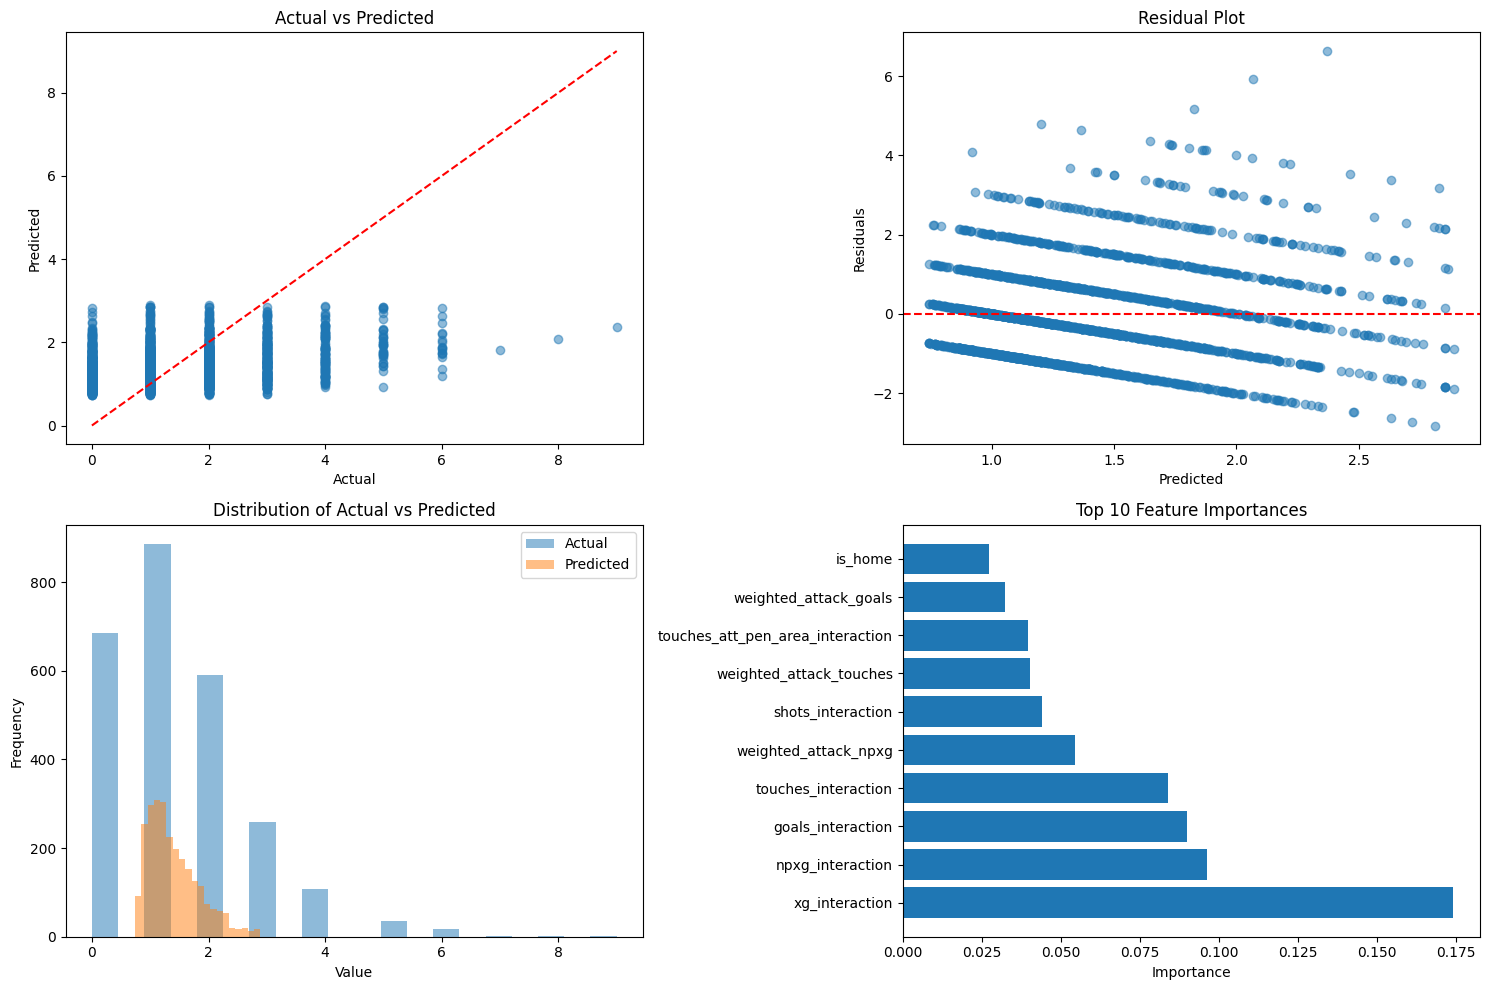

C:\Users\Owner\AppData\Local\Temp\ipykernel_7392\1546311674.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = eval_df.groupby('pred_bin').agg(


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
# Stage 2 best parameters: {'max_depth': 2, 'eta': 0.18, 'subsample': 1.0, 'colsample_bytree': 0.6, 'min_child_weight': 1, 'gamma': 0.19999999999999998, 'reg_alpha': 0, 'reg_lambda': 0.01}
# Get predictions on the test set
y_pred = best_model.predict(X_test)

# Convert to numpy arrays with explicit dtype to ensure compatibility
y_test_np = np.asarray(y_test, dtype=np.float64)
y_pred_np = np.asarray(y_pred, dtype=np.float64)

# Print array types and shapes to debug
print(f"y_test type: {type(y_test)}, shape: {y_test.shape if hasattr(y_test, 'shape') else 'no shape'}")
print(f"y_test_np type: {type(y_test_np)}, shape: {y_test_np.shape}, dtype: {y_test_np.dtype}")
print(f"y_pred_np type: {type(y_pred_np)}, shape: {y_pred_np.shape}, dtype: {y_pred_np.dtype}")

# Basic regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_np, y_pred_np)
rmse = np.sqrt(mean_squared_error(y_test_np, y_pred_np))
r2 = r2_score(y_test_np, y_pred_np)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Let's try another approach for calculating Poisson log-likelihood
print("\nCalculating Poisson metrics...")

# Ensure positive predictions
y_pred_np = np.maximum(y_pred_np, 1e-6)

# A simpler version of Poisson deviance (using numpy operations only)
deviance = 0
nll = 0

# Calculate manually element by element to avoid any data type issues
for i in range(len(y_test_np)):
    # Get individual values (definitely scalars)
    y_true_i = float(y_test_np[i])
    y_pred_i = float(y_pred_np[i])
    
    # Calculate log-factorial using loggamma
    from scipy.special import loggamma
    log_factorial = loggamma(y_true_i + 1)
    
    # Calculate components
    if y_true_i > 0:
        component = y_pred_i - y_true_i * np.log(y_pred_i) + log_factorial
    else:
        # When y_true is 0, y_true * log(y_pred) is 0
        component = y_pred_i + log_factorial
    
    deviance += 2 * component
    nll += component

# Average the NLL
nll /= len(y_test_np)

print(f"Poisson Deviance: {deviance:.4f}")
print(f"Poisson Negative Log-Likelihood: {nll:.4f}")

# Calculate calibration (average predicted vs average actual)
print(f"Average actual: {np.mean(y_test_np):.4f}")
print(f"Average predicted: {np.mean(y_pred_np):.4f}")
print(f"Ratio (pred/actual): {np.mean(y_pred_np)/np.mean(y_test_np):.4f}")

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Quick plots
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(y_test_np, y_pred_np, alpha=0.5)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Plot 2: Residuals
plt.subplot(2, 2, 2)
residuals = y_test_np - y_pred_np
plt.scatter(y_pred_np, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Plot 3: Distribution of Actual vs Predicted
plt.subplot(2, 2, 3)
plt.hist(y_test_np, bins=20, alpha=0.5, label='Actual')
plt.hist(y_pred_np, bins=20, alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Actual vs Predicted')

# Plot 4: Feature importances
plt.subplot(2, 2, 4)
n_features = 10  # Number of top features to display
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False).head(n_features)

plt.barh(range(n_features), importances['Importance'], align='center')
plt.yticks(range(n_features), importances['Feature'])
plt.xlabel('Importance')
plt.title(f'Top {n_features} Feature Importances')

plt.tight_layout()
plt.show()

# Evaluate performance by binning predictions
# Create a DataFrame from numpy arrays for easier binning
import pandas as pd
eval_df = pd.DataFrame({
    'actual': y_test_np,
    'predicted': y_pred_np
})

# Define bins for analysis
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, float('inf')]
bin_labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-4', '4-5', '5+']

# Bin predictions
eval_df['pred_bin'] = pd.cut(eval_df['predicted'], bins=bins, labels=bin_labels)

# Group by prediction bin and calculate metrics
bin_analysis = eval_df.groupby('pred_bin').agg(
    count=('actual', 'count'),
    avg_actual=('actual', 'mean'),
    avg_predicted=('predicted', 'mean'),
    mae=('actual', lambda x: mean_absolute_error(x, eval_df.loc[x.index, 'predicted'])),
    ratio=('actual', lambda x: np.mean(x) / np.mean(eval_df.loc[x.index, 'predicted']))
).reset_index()

print("\nPerformance by prediction bin:")
print(bin_analysis)

### Error Analysis

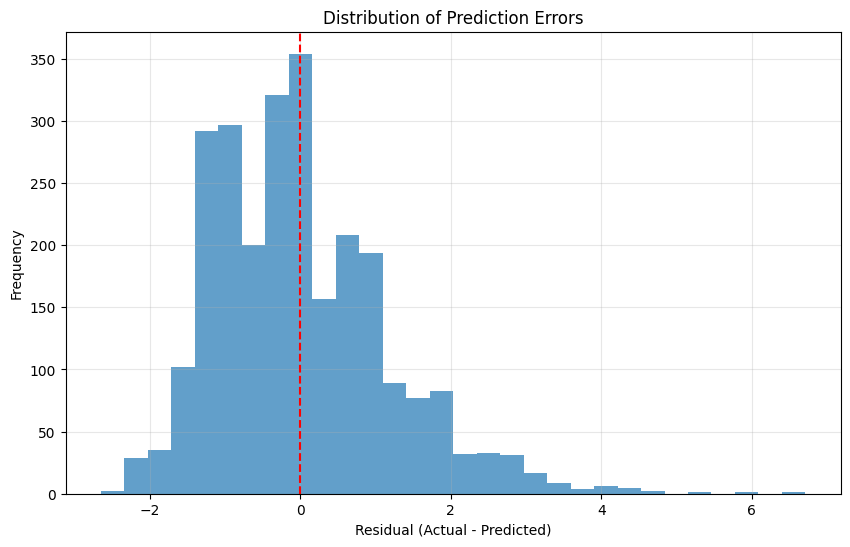

Mean error: 0.0015
Median error: -0.1379
Standard deviation of errors: 1.1644
Percentage of underestimates: 43.49%
Percentage of overestimates: 56.51%


In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
y_true = dtest.get_label()
y_pred = optimized_model.predict(dtest)
residuals = y_true - y_pred

# Visualize error distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# Calculate error statistics
print(f"Mean error: {np.mean(residuals):.4f}")
print(f"Median error: {np.median(residuals):.4f}")
print(f"Standard deviation of errors: {np.std(residuals):.4f}")
print(f"Percentage of underestimates: {(residuals > 0).mean() * 100:.2f}%")
print(f"Percentage of overestimates: {(residuals < 0).mean() * 100:.2f}%")

Top teams identified: ['Bayern Munich', 'Paris S-G', 'Manchester City', 'Liverpool', 'Leverkusen', 'Dortmund', 'Inter', 'Real Madrid', 'Arsenal', 'Barcelona', 'RB Leipzig', 'Atalanta', 'Tottenham', 'Monaco', 'Atlético Madrid', 'Milan', 'Napoli', 'Marseille', 'Girona', 'Rennes', 'Chelsea', 'Villarreal', 'Newcastle Utd', 'Lyon', 'Stuttgart']

Average Error by Match Type (positive = underprediction, negative = overprediction):
match_type
Other vs Good   -0.116177
Other           -0.024382
Good vs Good     0.016412
Good vs Other    0.190003
Name: error, dtype: float64

Goals by Match Type:
               true_goals  pred_goals     error  pred_ratio
match_type                                                 
Good vs Good     1.627737    1.611326  0.016412    0.989918
Good vs Other    2.056751    1.866748  0.190003    0.907620
Other            1.273632    1.298014 -0.024382    1.019144
Other vs Good    0.963947    1.080124 -0.116177    1.120523


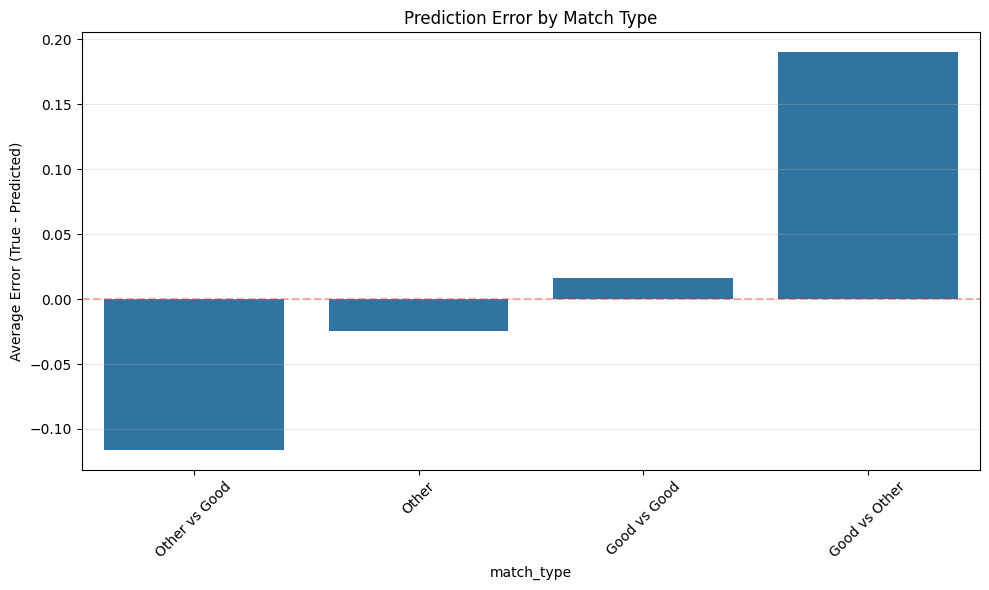

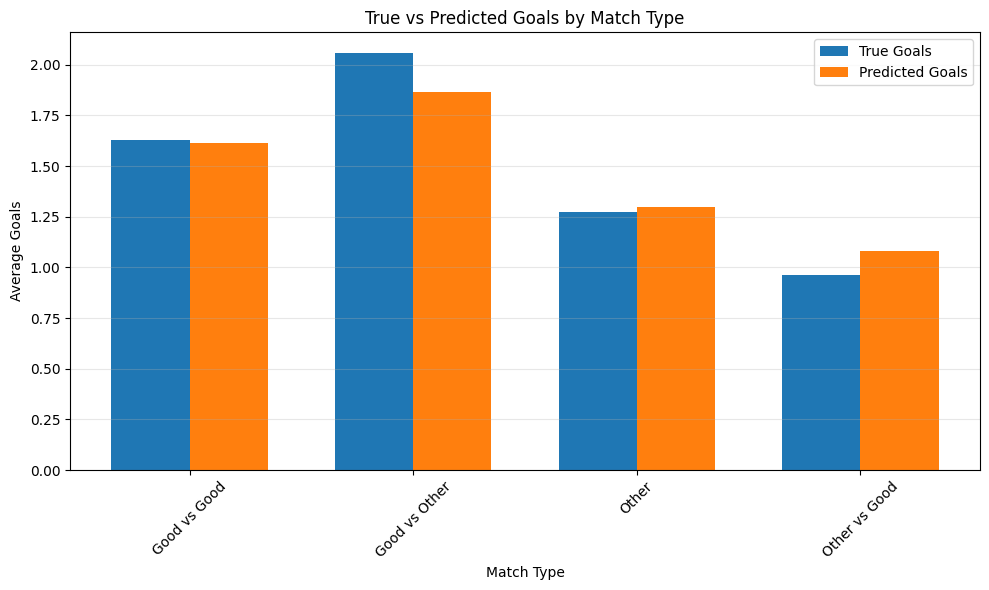

In [ ]:
# Simpler approach with careful type handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Get team information
test_df = df.iloc[X_test.index].copy() if hasattr(X_test, 'index') else df.head(len(X_test)).copy()

# 2. Make sure to convert values to numeric
test_df['true_goals'] = pd.to_numeric(y_test, errors='coerce')
test_df['pred_goals'] = pd.to_numeric(y_pred, errors='coerce')
test_df['error'] = test_df['true_goals'] - test_df['pred_goals']

# 3. Calculate team quality
team_quality = df.groupby('team')['weighted_attack_goals'].mean().sort_values(ascending=False)

# 4. Identify "good" teams (top third)
num_teams = len(team_quality)
top_teams = team_quality.index[:num_teams//5].tolist()
print(f"Top teams identified: {top_teams}")

# 5. Mark matches involving good teams
test_df['good_team'] = test_df['team'].isin(top_teams)
test_df['good_opponent'] = test_df['opp_team'].isin(top_teams)
test_df['both_good'] = test_df['good_team'] & test_df['good_opponent']
test_df['match_type'] = 'Other'
test_df.loc[test_df['both_good'], 'match_type'] = 'Good vs Good'
test_df.loc[(test_df['good_team'] & ~test_df['good_opponent']), 'match_type'] = 'Good vs Other'
test_df.loc[(~test_df['good_team'] & test_df['good_opponent']), 'match_type'] = 'Other vs Good'

# 6. Calculate average error by match type
error_by_match = test_df.groupby('match_type')['error'].mean().sort_values()
print("\nAverage Error by Match Type (positive = underprediction, negative = overprediction):")
print(error_by_match)

# 7. Compare predicted vs actual goals by match type
goals_by_match = test_df.groupby('match_type').agg({
    'true_goals': 'mean',
    'pred_goals': 'mean',
    'error': 'mean'
})
goals_by_match['pred_ratio'] = goals_by_match['pred_goals'] / goals_by_match['true_goals']
print("\nGoals by Match Type:")
print(goals_by_match)

# 8. Simple bar chart showing prediction error by match type
plt.figure(figsize=(10, 6))
sns.barplot(x=error_by_match.index, y=error_by_match.values)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Prediction Error by Match Type')
plt.ylabel('Average Error (True - Predicted)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Bar chart comparing true vs predicted goals
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(goals_by_match))
plt.bar(index, goals_by_match['true_goals'], bar_width, label='True Goals')
plt.bar(index + bar_width, goals_by_match['pred_goals'], bar_width, label='Predicted Goals')
plt.title('True vs Predicted Goals by Match Type')
plt.xlabel('Match Type')
plt.ylabel('Average Goals')
plt.xticks(index + bar_width/2, goals_by_match.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Future Predictions

In [ ]:
def create_team_stats_table(df):
    """
    Create a team stats table adapted to your specific data structure.
    """
    import pandas as pd
    
    # Get the list of all teams
    all_teams = pd.concat([df['team'], df['opp_team']]).unique()
    
    # Create an empty dataframe to store the most recent stats
    team_stats = pd.DataFrame()
    
    # For each team, get their most recent match data (for attack metrics)
    # and also calculate defense metrics from games where they were the opponent
    for team in all_teams:
        # Get attacking metrics from their most recent match as the main team
        team_matches = df[df['team'] == team].sort_values('match_date', ascending=False)
        
        if len(team_matches) > 0:
            most_recent = team_matches.iloc[0].copy()
            
            # Get defensive metrics by looking at matches where they were the opponent
            opp_matches = df[df['opp_team'] == team].sort_values('match_date', ascending=False)
            
            # Create a base dictionary with team info
            stats_dict = {
                'team': team,
                'last_match_date': most_recent['match_date'],
                'last_opponent': most_recent['opp_team'],
                'last_season': most_recent['season']
            }
            
            # Add attacking metrics from their most recent match
            attack_cols = [col for col in df.columns if col.startswith('weighted_attack_')]
            for col in attack_cols:
                stats_dict[col] = most_recent[col]
            
            # Add defensive metrics from matches where they were the opponent
            if len(opp_matches) > 0:
                recent_opp_match = opp_matches.iloc[0]
                
                # The opponent's attacking metrics are this team's defensive metrics
                # Map 'weighted_attack_*' from opponent to 'weighted_defense_*' for this team
                for col in attack_cols:
                    defense_col = col.replace('weighted_attack_', 'weighted_defense_')
                    stats_dict[defense_col] = recent_opp_match[col]
            
            # Add to the team stats dataframe
            team_stats = pd.concat([team_stats, pd.DataFrame([stats_dict])], ignore_index=True)
    
    return team_stats

def predict_match_from_stats_table(model, team_stats, home_team, away_team):
    """
    Predict match result using the trained model and team stats table.
    
    Parameters:
    -----------
    model : trained XGBoost model
        The model to use for prediction
    team_stats : DataFrame
        Table with team statistics
    home_team : str
        Name of the home team
    away_team : str
        Name of the away team
        
    Returns:
    --------
    dict
        Dictionary with prediction results
    """
    # Get most recent matches for each team
    home_recent = df[df['team'] == home_team].sort_values('match_date', ascending=False).iloc[0]
    away_recent = df[df['team'] == away_team].sort_values('match_date', ascending=False).iloc[0]
    
    # Create rows for prediction
    home_row = {'is_home': 1, 'season': home_recent['season']}
    away_row = {'is_home': 0, 'season': away_recent['season']}
    
    # Add attack features (both long-term and form)
    attack_cols = [col for col in df.columns if col.startswith('weighted_attack_') and not col.endswith('_form')]
    form_attack_cols = [col for col in df.columns if col.startswith('weighted_attack_') and col.endswith('_form')]
    
    for col in attack_cols:
        home_row[col] = home_recent[col]
        away_row[col] = away_recent[col]
    
    for col in form_attack_cols:
        if col in home_recent.index and col in away_recent.index:
            home_row[col] = home_recent[col]
            away_row[col] = away_recent[col]
    
    # Get defense features
    # For home team prediction, we need away team's defense
    away_defense = df[df['opp_team'] == away_team].sort_values('match_date', ascending=False)
    # For away team prediction, we need home team's defense
    home_defense = df[df['opp_team'] == home_team].sort_values('match_date', ascending=False)
    
    if len(away_defense) > 0:
        away_defense = away_defense.iloc[0]
    else:
        away_defense = df.mean()  # Fallback to averages
    
    if len(home_defense) > 0:
        home_defense = home_defense.iloc[0]
    else:
        home_defense = df.mean()  # Fallback to averages
    
    # Add defense features (both long-term and form)
    defense_cols = [col for col in df.columns if col.startswith('opp_weighted_defense_opp_') and not col.endswith('_form')]
    form_defense_cols = [col for col in df.columns if col.startswith('opp_weighted_defense_opp_') and col.endswith('_form')]
    
    for col in defense_cols:
        home_row[col] = away_defense[col]
        away_row[col] = home_defense[col]
    
    for col in form_defense_cols:
        if col in away_defense.index and col in home_defense.index:
            home_row[col] = away_defense[col]
            away_row[col] = home_defense[col]
    
    # Calculate gap and ratio features for both long-term and form metrics
    for suffix in ['', '_form']:
        metrics = [col.replace('weighted_attack_', '').replace(suffix, '') 
                  for col in home_row.keys() 
                  if col.startswith('weighted_attack_') and col.endswith(suffix)]
        
        for metric in metrics:
            attack_col = f'weighted_attack_{metric}{suffix}'
            defense_col = f'opp_weighted_defense_opp_{metric}{suffix}'
            
            if attack_col in home_row and defense_col in home_row:
                # Gap features
                home_row[f'{metric}_gap{suffix}'] = home_row[attack_col] - home_row[defense_col]
                away_row[f'{metric}_gap{suffix}'] = away_row[attack_col] - away_row[defense_col]
                
                # Ratio features
                if home_row[defense_col] != 0:
                    home_row[f'{metric}_ratio{suffix}'] = home_row[attack_col] / home_row[defense_col]
                else:
                    home_row[f'{metric}_ratio{suffix}'] = 1
                
                if away_row[defense_col] != 0:
                    away_row[f'{metric}_ratio{suffix}'] = away_row[attack_col] / away_row[defense_col]
                else:
                    away_row[f'{metric}_ratio{suffix}'] = 1
                    
                # Add interaction terms
                home_row[f'{metric}_interaction{suffix}'] = home_row[attack_col] * home_row[defense_col]
                away_row[f'{metric}_interaction{suffix}'] = away_row[attack_col] * away_row[defense_col]
    
    # Create prediction DataFrame
    prediction_df = pd.DataFrame([home_row, away_row])
    
    # Convert season to category codes if it's a string
    if isinstance(prediction_df['season'].iloc[0], str):
        prediction_df['season'] = prediction_df['season'].astype('category').cat.codes
    
    # Ensure all model features are present
    # For XGBRegressor, the feature names attribute is feature_names_in_
    if hasattr(model, 'feature_names_in_'):
        model_features = model.feature_names_in_
    else:
        # Fallback to X_train columns if feature_names_in_ is not available
        model_features = X_train.columns
    
    for feature in model_features:
        if feature not in prediction_df.columns:
            prediction_df[feature] = 0
    
    # Select only the features needed by the model
    prediction_df = prediction_df[model_features]
    
    # Make predictions
    # Check if the model has a predict method (standard sklearn/XGBoost models)
    goal_predictions = model.predict(prediction_df)
    
    # Return results
    return {
        'match': f"{home_team} vs {away_team}",
        'predicted_home_goals': goal_predictions[0],
        'predicted_away_goals': goal_predictions[1],
        'predicted_result': f"{round(goal_predictions[0])}-{round(goal_predictions[1])}",
        'home_advantage': f"{goal_predictions[0] - goal_predictions[1]:.2f} goals"
    }

# Create team stats table
team_stats = create_team_stats_table(df)

# Make prediction for Newcastle vs Chelsea
result = predict_match_from_stats_table(best_model, team_stats, "Wolves", 'Brighton')
print(result)

{'match': 'Wolves vs Brighton', 'predicted_home_goals': 1.4085689, 'predicted_away_goals': 1.6117486, 'predicted_result': '1-2', 'home_advantage': '-0.20 goals'}
